In [183]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge

In [184]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [185]:
df_data = pd.read_csv('housing.csv')

In [186]:
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [187]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

In [188]:
df_base = df_data[base]

In [189]:
df_base.columns = df_base.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df_base.dtypes[df_base.dtypes == 'object'].index)
print(categorical_columns)
df_base.head()

['ocean_proximity']


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [190]:
col = list(df_base)
print(col)

print(df_base.isnull().sum())


df_base_filled = df_base.fillna(0)

#this works but is it neccesary though?
# for i in col:
#     if df_base[i].isnull().sum() > 0:
#         df_base_filled = df_base.fillna(0)

df_base_filled.isnull().sum()

['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [191]:
df_base_filled['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [192]:
print(f'<1H OCEAN')

<1H OCEAN


In [193]:
df_base_filled['rooms_per_household'] = (df_base_filled['total_rooms'] / df_base_filled['households'])
df_base_filled['bedrooms_per_room'] = (df_base_filled['total_bedrooms'] / df_base_filled['total_rooms'])
df_base_filled['population_per_household'] = (df_base_filled['population'] / df_base_filled['households'])

df_base_filled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [194]:
#X_train, X_test, y_train, y_test = train_test_split(df_base_filled, test_size=0.4, random_state=0)
df_temp_train, df_test = train_test_split(df_base_filled, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_temp_train, test_size=0.25, random_state=42)

print(df_train.shape, df_val.shape, df_test.shape)

(12384, 13) (4128, 13) (4128, 13)


In [195]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

df_train.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)

<AxesSubplot:>

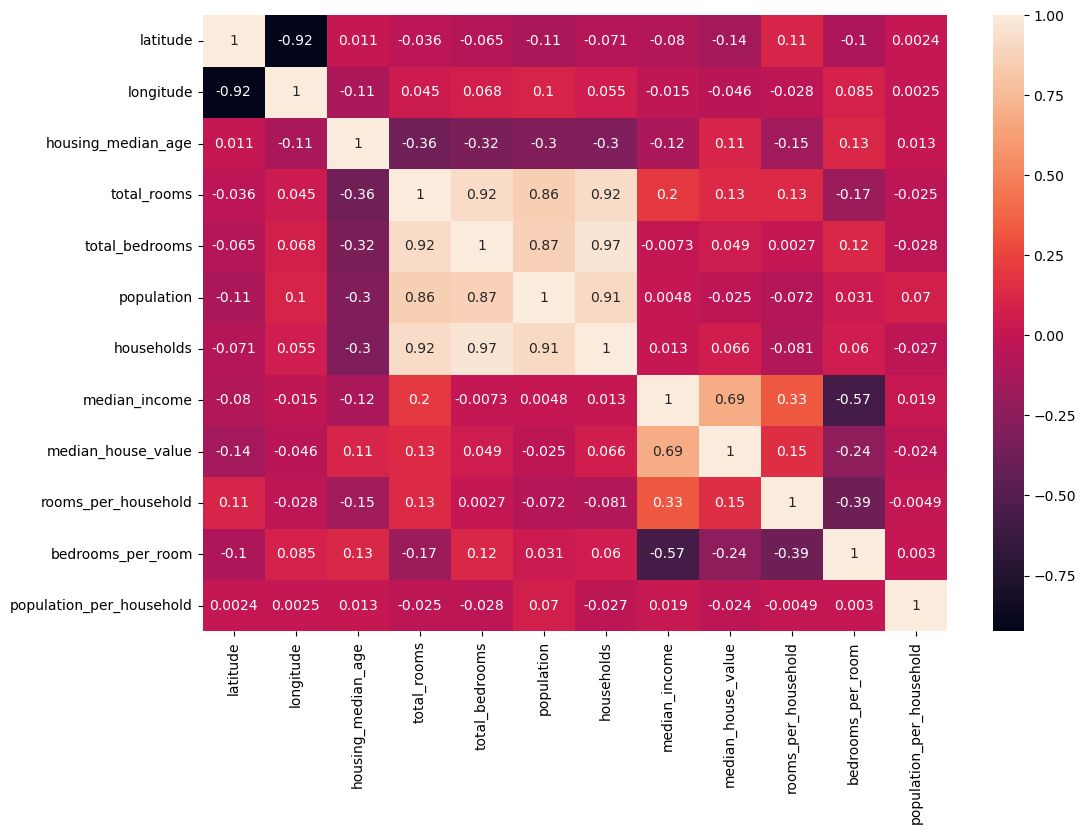

In [196]:
plt.figure(figsize = (12,8))

sns.heatmap(df_base_filled.corr(), annot=True)


    total_bedrooms and households --- 0.97
    total_bedrooms and total_rooms --- 0.92
    population and households --- 0.91
    population_per_household and total_rooms --- -0.025


In [197]:
mean_val = df_base_filled['median_house_value'].mean()
print(round(mean_val, 0))

y_train_above_average = np.where(y_train >= mean_val, 1, 0)
y_val_above_average = np.where(y_val >= mean_val, 1, 0)
y_test_above_average = np.where(y_test >= mean_val, 1, 0)

206856.0


In [198]:
#finding categorical labels... 
df_train.dtypes
print(f"Categorical column is: 'ocean_proximity' ")

Categorical column is: 'ocean_proximity' 


In [199]:
print(f"Mutual information between categorical and binary data is: {round(mutual_info_score(y_train_above_average, df_train['ocean_proximity']), 2)}")

Mutual information between categorical and binary data is: 0.1


In [200]:
divec = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = divec.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = divec.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train_above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [201]:
model.intercept_[0]

-0.06226206219069978

In [202]:
model.coef_[0].round(3)

array([ 0.113,  0.004,  0.036,  0.103,  0.083,  1.196,  0.452, -1.599,
        0.012,  0.309,  0.763, -0.002,  0.01 , -0.014,  0.002, -0.   ])

In [203]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'bedrooms_per_room': 0.113,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.103,
 'longitude': 0.083,
 'median_income': 1.196,
 'ocean_proximity=<1H OCEAN': 0.452,
 'ocean_proximity=INLAND': -1.599,
 'ocean_proximity=ISLAND': 0.012,
 'ocean_proximity=NEAR BAY': 0.309,
 'ocean_proximity=NEAR OCEAN': 0.763,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.014,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

In [204]:
y_pred = model.predict_proba(X_val)[:, 1]
above_avg_price_decision = (y_pred >= 0.5)
(y_val == above_avg_price_decision).mean()

0.0

In [205]:
above_avg_price_decision.astype(int)

array([0, 0, 1, ..., 1, 1, 0])

In [206]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = above_avg_price_decision.astype(int)
df_pred['actual'] = y_val_above_average
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [207]:
df_pred.head()

,probability,prediction,actual,correct
0,0.087543,0,0,True
1,0.159936,0,0,True
2,0.952086,1,1,True
3,0.492404,0,1,False
4,0.979478,1,1,True


In [208]:
round(df_pred.correct.mean(),2)

0.84

In [209]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train_above_average)
y_pred = model.predict_proba(X_val)[:, 1]
above_avg_price_decision = (y_pred >= 0.5)
df_pred_all = pd.DataFrame()
df_pred_all['probability'] = y_pred
df_pred_all['prediction'] = above_avg_price_decision.astype(int)
df_pred_all['actual'] = y_val_above_average
df_pred_all['correct'] = df_pred_all.prediction == df_pred_all.actual
model_1_acc = round(df_pred_all.correct.mean(),2)
print('Accuracy for the model with all features is {0}.'.format(model_1_acc))

Accuracy for the model with all features is 0.84.


In [213]:
# removed 'latitude'
model_2_features = ['longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
# removed 'longitude'
model_3_features = ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
# removed 'housing_median_age'
model_4_features = ['latitude', 'longitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
# removed 'total_rooms'
model_5_features = ['latitude', 'longitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
# removed 'total_bedrooms'
model_6_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'ocean_proximity']
# removed 'population'
model_7_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income', 'ocean_proximity']
# removed 'households'
model_8_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 'ocean_proximity']
# removed 'median_income'
model_9_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
# removed 'ocean_proximity'
model_10_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

model_02

In [215]:
dicts_train_2 = df_train[model_2_features].to_dict(orient='records')
dicts_val_2 = df_val[model_2_features].to_dict(orient='records')
dv_2 = DictVectorizer(sparse=False)
dv_2.fit(dicts_train_2)
X_train_2 = dv_2.transform(dicts_train_2)
X_val_2 = dv_2.transform(dicts_val_2)
model_2 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_2.fit(X_train_2, y_train_above_average)
dict(zip(dv_2.get_feature_names(), model_2.coef_[0].round(3)))

y_pred_2 = model_2.predict_proba(X_val_2)[:, 1]
above_avg_price_decision_2 = (y_pred_2 >= 0.5)
df_pred_2 = pd.DataFrame()
df_pred_2['probability'] = y_pred_2
df_pred_2['prediction'] = above_avg_price_decision_2.astype(int)
df_pred_2['actual'] = y_val_above_average
df_pred_2['correct'] = df_pred_2.prediction == df_pred_2.actual
model_2_acc = round(df_pred_2.correct.mean(),2)
print('Model 2 accuracy is {0}.'.format(model_2_acc))

Model 2 accuracy is 0.83.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


model 3

In [217]:
dicts_train_3 = df_train[model_3_features].to_dict(orient='records')
dicts_val_3 = df_val[model_3_features].to_dict(orient='records')
dv_3 = DictVectorizer(sparse=False)
dv_3.fit(dicts_train_3)
X_train_3 = dv_3.transform(dicts_train_3)
X_val_3 = dv_3.transform(dicts_val_3)
model_3 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_3.fit(X_train_3, y_train_above_average)
dict(zip(dv_3.get_feature_names(), model_3.coef_[0].round(3)))



y_pred_3 = model_3.predict_proba(X_val_3)[:, 1]
above_avg_price_decision_3 = (y_pred_3 >= 0.5)
df_pred_3 = pd.DataFrame()
df_pred_3['probability'] = y_pred_3
df_pred_3['prediction'] = above_avg_price_decision_3.astype(int)
df_pred_3['actual'] = y_val_above_average
df_pred_3['correct'] = df_pred_3.prediction == df_pred_3.actual
model_3_acc = round(df_pred_3.correct.mean(),2)
print('Model 3 accuracy is {0}.'.format(model_3_acc))



Model 3 accuracy is 0.83.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


model 4

In [218]:
dicts_train_4 = df_train[model_4_features].to_dict(orient='records')
dicts_val_4 = df_val[model_4_features].to_dict(orient='records')
dv_4 = DictVectorizer(sparse=False)
dv_4.fit(dicts_train_4)
X_train_4 = dv_4.transform(dicts_train_4)
X_val_4 = dv_4.transform(dicts_val_4)
model_4 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_4.fit(X_train_4, y_train_above_average)
dict(zip(dv_4.get_feature_names(), model_4.coef_[0].round(3)))

y_pred_4 = model_4.predict_proba(X_val_4)[:, 1]
above_avg_price_decision_4 = (y_pred_4 >= 0.5)
df_pred_4 = pd.DataFrame()
df_pred_4['probability'] = y_pred_4
df_pred_4['prediction'] = above_avg_price_decision_4.astype(int)
df_pred_4['actual'] = y_val_above_average
df_pred_4['correct'] = df_pred_4.prediction == df_pred_4.actual
model_4_acc = round(df_pred_4.correct.mean(),2)
print('Model 4 accuracy is {0}.'.format(model_4_acc))

Model 4 accuracy is 0.83.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [219]:
dicts_train_5 = df_train[model_5_features].to_dict(orient='records')
dicts_val_5 = df_val[model_5_features].to_dict(orient='records')
dv_5 = DictVectorizer(sparse=False)
dv_5.fit(dicts_train_5)
X_train_5 = dv_5.transform(dicts_train_5)
X_val_5 = dv_5.transform(dicts_val_5)
model_5 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_5.fit(X_train_5, y_train_above_average)
dict(zip(dv_5.get_feature_names(), model_5.coef_[0].round(3)))



y_pred_5 = model_5.predict_proba(X_val_5)[:, 1]
above_avg_price_decision_5 = (y_pred_5 >= 0.5)
df_pred_5 = pd.DataFrame()
df_pred_5['probability'] = y_pred_5
df_pred_5['prediction'] = above_avg_price_decision_5.astype(int)
df_pred_5['actual'] = y_val_above_average
df_pred_5['correct'] = df_pred_5.prediction == df_pred_5.actual
model_5_acc = round(df_pred_5.correct.mean(),2)
print('Model 5 accuracy is {0}.'.format(model_5_acc))

Model 5 accuracy is 0.84.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [220]:
dicts_train_6 = df_train[model_6_features].to_dict(orient='records')
dicts_val_6 = df_val[model_6_features].to_dict(orient='records')
dv_6 = DictVectorizer(sparse=False)
dv_6.fit(dicts_train_6)
X_train_6 = dv_6.transform(dicts_train_6)
X_val_6 = dv_6.transform(dicts_val_6)
model_6 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_6.fit(X_train_6, y_train_above_average)
dict(zip(dv_6.get_feature_names(), model_6.coef_[0].round(3)))

y_pred_6 = model_6.predict_proba(X_val_6)[:, 1]
above_avg_price_decision_6 = (y_pred_6 >= 0.5)
df_pred_6 = pd.DataFrame()
df_pred_6['probability'] = y_pred_6
df_pred_6['prediction'] = above_avg_price_decision_6.astype(int)
df_pred_6['actual'] = y_val_above_average
df_pred_6['correct'] = df_pred_6.prediction == df_pred_6.actual
model_6_acc = round(df_pred_6.correct.mean(),2)
print('Model 6 accuracy is {0}.'.format(model_6_acc))

Model 6 accuracy is 0.84.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [221]:
dicts_train_7 = df_train[model_7_features].to_dict(orient='records')
dicts_val_7 = df_val[model_7_features].to_dict(orient='records')
dv_7 = DictVectorizer(sparse=False)
dv_7.fit(dicts_train_7)
X_train_7 = dv_7.transform(dicts_train_7)
X_val_7 = dv_7.transform(dicts_val_7)
model_7 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_7.fit(X_train_7, y_train_above_average)
dict(zip(dv_7.get_feature_names(), model_7.coef_[0].round(3)))

y_pred_7 = model_7.predict_proba(X_val_7)[:, 1]
above_avg_price_decision_7 = (y_pred_7 >= 0.5)
df_pred_7 = pd.DataFrame()
df_pred_7['probability'] = y_pred_7
df_pred_7['prediction'] = above_avg_price_decision_7.astype(int)
df_pred_7['actual'] = y_val_above_average
df_pred_7['correct'] = df_pred_7.prediction == df_pred_7.actual
model_7_acc = round(df_pred_7.correct.mean(),2)
print('Model 7 accuracy is {0}.'.format(model_7_acc))

Model 7 accuracy is 0.82.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [222]:
dicts_train_8 = df_train[model_8_features].to_dict(orient='records')
dicts_val_8 = df_val[model_8_features].to_dict(orient='records')
dv_8 = DictVectorizer(sparse=False)
dv_8.fit(dicts_train_8)
X_train_8 = dv_8.transform(dicts_train_8)
X_val_8 = dv_8.transform(dicts_val_8)
model_8 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_8.fit(X_train_8, y_train_above_average)
dict(zip(dv_8.get_feature_names(), model_8.coef_[0].round(3)))

y_pred_8 = model_8.predict_proba(X_val_8)[:, 1]
above_avg_price_decision_8 = (y_pred_8 >= 0.5)
df_pred_8 = pd.DataFrame()
df_pred_8['probability'] = y_pred_8
df_pred_8['prediction'] = above_avg_price_decision_8.astype(int)
df_pred_8['actual'] = y_val_above_average
df_pred_8['correct'] = df_pred_8.prediction == df_pred_8.actual
model_8_acc = round(df_pred_8.correct.mean(),2)
print('Model 8 accuracy is {0}.'.format(model_8_acc))

Model 8 accuracy is 0.83.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [223]:
dicts_train_9 = df_train[model_9_features].to_dict(orient='records')
dicts_val_9 = df_val[model_9_features].to_dict(orient='records')
dv_9 = DictVectorizer(sparse=False)
dv_9.fit(dicts_train_9)
X_train_9 = dv_9.transform(dicts_train_9)
X_val_9 = dv_9.transform(dicts_val_9)
model_9 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_9.fit(X_train_9, y_train_above_average)
dict(zip(dv_9.get_feature_names(), model_9.coef_[0].round(3)))

y_pred_9 = model_9.predict_proba(X_val_9)[:, 1]
above_avg_price_decision_9 = (y_pred_9 >= 0.5)
df_pred_9 = pd.DataFrame()
df_pred_9['probability'] = y_pred_9
df_pred_9['prediction'] = above_avg_price_decision_9.astype(int)
df_pred_9['actual'] = y_val_above_average
df_pred_9['correct'] = df_pred_9.prediction == df_pred_9.actual
model_9_acc = round(df_pred_9.correct.mean(),2)
print('Model 9 accuracy is {0}.'.format(model_9_acc))

Model 9 accuracy is 0.78.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [224]:
dicts_train_10 = df_train[model_10_features].to_dict(orient='records')
dicts_val_10 = df_val[model_10_features].to_dict(orient='records')
dv_10 = DictVectorizer(sparse=False)
dv_10.fit(dicts_train_10)
X_train_10 = dv_10.transform(dicts_train_10)
X_val_10 = dv_10.transform(dicts_val_10)
model_10 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_10.fit(X_train_10, y_train_above_average)
dict(zip(dv_10.get_feature_names(), model_10.coef_[0].round(3)))

y_pred_10 = model_10.predict_proba(X_val_10)[:, 1]
above_avg_price_decision_10 = (y_pred_10 >= 0.5)
df_pred_10 = pd.DataFrame()
df_pred_10['probability'] = y_pred_10
df_pred_10['prediction'] = above_avg_price_decision_10.astype(int)
df_pred_10['actual'] = y_val_above_average
df_pred_10['correct'] = df_pred_10.prediction == df_pred_10.actual
model_10_acc = round(df_pred_10.correct.mean(),2)
print('Model 10 accuracy is {0}.'.format(model_10_acc))

Model 10 accuracy is 0.82.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [233]:
data = {'model': ['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8','Model 9','Model 10'],
        'desc': ['All','No latitude','No longitude','No housing_median_age','No total_rooms','No total_bedrooms','No population','No households','No median_income','No ocean_proximity'],
        'accuracy': [model_1_acc, model_2_acc, model_3_acc, model_4_acc, model_5_acc, model_6_acc, model_7_acc, model_8_acc, model_9_acc, model_10_acc],
        'diff_model_1_acc': [model_1_acc - model_1_acc, model_2_acc - model_1_acc, model_3_acc - model_1_acc, model_4_acc - model_1_acc, model_5_acc - model_1_acc,
                             model_6_acc - model_1_acc, model_7_acc - model_1_acc, model_8_acc - model_1_acc, model_9_acc - model_1_acc, model_10_acc - model_1_acc]
       }
summary = pd.DataFrame(data)
summary

,model,desc,accuracy,diff_model_1_acc
0,Model 1,All,0.84,0.00
1,Model 2,No latitude,0.83,-0.01
2,Model 3,No longitude,0.83,-0.01
3,Model 4,No housing_median_age,0.83,-0.01
4,Model 5,No total_rooms,0.84,0.00
5,Model 6,No total_bedrooms,0.84,0.00
6,Model 7,No population,0.82,-0.02
7,Model 8,No households,0.83,-0.01
8,Model 9,No median_income,0.78,-0.06
9,Model 10,No ocean_proximity,0.82,-0.02


In [227]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [232]:
alpha_values = [0, 0.01, 0.1, 1, 10]
rmses = []

for alpha in alpha_values:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    rmses.append(rmse)
    print('Ridge Regression with alpha = {0}, RMSE on validation set is {1}'.format(alpha, round(rmse,3)))

Ridge Regression with alpha = 0, RMSE on validation set is 0.324
Ridge Regression with alpha = 0.01, RMSE on validation set is 0.324
Ridge Regression with alpha = 0.1, RMSE on validation set is 0.324
Ridge Regression with alpha = 1, RMSE on validation set is 0.324
Ridge Regression with alpha = 10, RMSE on validation set is 0.324


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.96568e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
